In [51]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 

In [63]:
img = cv2.imread('Dataset/Test108.jpg',0)

In [64]:
''''Adaptive Thresholding: This method gives a threshold 
for a small part of the image depending on the characteristics
of its locality and neighbours i.e there is no single fixed 
threshold for the whole image but every small part of the
image has a different threshold depending upon the locality
and also gives smooth transition.'''

adaptive_threshold_img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) #imgf contains Binary image

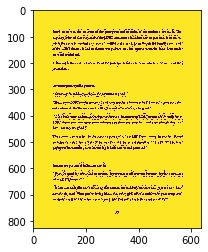

In [65]:
plt.imshow(adaptive_threshold_img)
plt.show()

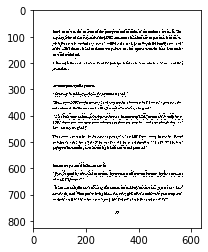

In [66]:
#Denoising

adaptive_threshold_img = cv2.cvtColor(adaptive_threshold_img, cv2.COLOR_GRAY2BGR) 
denoised_img = cv2.fastNlMeansDenoisingColored(adaptive_threshold_img, None, 10, 10, 7, 15) 
 
plt.imshow(denoised_img) 
plt.show()

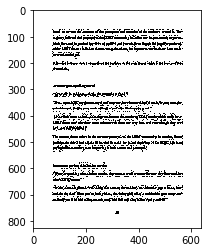

In [68]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(denoised_img,kernel,iterations = 1)
plt.imshow(erosion)
plt.show()

In [69]:
def preprocess(filename,img):
    adaptive_threshold_img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) #imgf contains Binary image
    adaptive_threshold_img = cv2.cvtColor(adaptive_threshold_img, cv2.COLOR_GRAY2BGR) 
    denoised_img = cv2.fastNlMeansDenoisingColored(adaptive_threshold_img, None, 10, 10, 7, 15) 
    cv2.imwrite('preprocessed_data/'+filename,denoised_img)

In [73]:
import os
dataset_loc = 'Dataset'
for file in os.listdir(dataset_loc):
    preprocess(file,cv2.imread(dataset_loc+'/'+file,0))